In [354]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import json
import urllib2
import sys
import scipy as py
import statsmodels.api as sm

import matplotlib as mpl
mpl.style.use('classic')

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [317]:
# pull data from NYC OpenData API and read to dataframe

url = "https://data.cityofnewyork.us/resource/rjkj-7qni.json"
response = urllib2.urlopen(url)
data = response.read().decode('utf-8')
data1 = json.loads(data)

boil = pd.DataFrame(data1)
boil.head()

,age_range_of_boiler,boiler_capacity_gross_btu_,boiler_installation_date,boiler_model,borough_block_and_lot_,building_manager,building_type,burner_model,city_council_district,condominium_housing_,...,owner_address_location,owner_address_state,owner_address_zip,primary_fuel,total_area_of_buildings_on_lot,total_estimated_cosumption_high_estimate_gallons_,total_estimated_cosumption_high_estimate_mmbtus_,total_estimated_cosumption_low_estimate_gallons_,total_estimated_cosumption_low_estimate_mmbtus_,year_constructed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
boil.columns

Index([u'age_range_of_boiler', u'boiler_capacity_gross_btu_',
       u'boiler_installation_date', u'boiler_model', u'borough_block_and_lot_',
       u'building_manager', u'building_type', u'burner_model',
       u'city_council_district', u'condominium_housing_',
       u'cooperative_housing_',
       u'deadline_for_complying_with_audit_and_retrocommissioning_law',
       u'deadline_for_phasing_out_6_oil_i_e_data_of_next_dep_permit_renewal_after_july_1_2012_',
       u'dep_boiler_application_',
       u'estimated_retirement_date_of_boiler_assuming_35_year_average_useful_life_',
       u'facility_address', u'facility_address_city',
       u'facility_address_location', u'facility_address_state',
       u'facility_address_zip', u'is_boiler_dual_fuel_capable_',
       u'natural_gas_utility_con_edison_or_national_grid',
       u'needs_to_comply_with_greener_greater_buildings_laws_',
       u'number_of_buildings_on_property_tax_lot_', u'number_of_floors',
       u'number_of_identical_boilers'

In [319]:
# drop unneeded columns

boil.drop([u'age_range_of_boiler', u'boiler_capacity_gross_btu_',
       u'boiler_model', u'borough_block_and_lot_',
       u'building_manager', u'building_type', u'burner_model',
       u'city_council_district', u'condominium_housing_',
       u'cooperative_housing_',
       u'deadline_for_complying_with_audit_and_retrocommissioning_law',
       u'deadline_for_phasing_out_6_oil_i_e_data_of_next_dep_permit_renewal_after_july_1_2012_',
       u'dep_boiler_application_',
       u'estimated_retirement_date_of_boiler_assuming_35_year_average_useful_life_',
       u'facility_address', u'facility_address_city',
       u'facility_address_location', u'facility_address_state',
       u'facility_address_zip', u'is_boiler_dual_fuel_capable_',
       u'natural_gas_utility_con_edison_or_national_grid',
       u'needs_to_comply_with_greener_greater_buildings_laws_',
       u'number_of_buildings_on_property_tax_lot_', u'number_of_floors',
       u'number_of_residential_units',
       u'number_of_total_units', u'owner', u'owner_address',
       u'owner_address_city', u'owner_address_location',
       u'owner_address_state', u'owner_address_zip'], axis=1, inplace=True)

In [320]:
boil.head()

,boiler_installation_date,number_of_identical_boilers,primary_fuel,total_area_of_buildings_on_lot,total_estimated_cosumption_high_estimate_gallons_,total_estimated_cosumption_high_estimate_mmbtus_,total_estimated_cosumption_low_estimate_gallons_,total_estimated_cosumption_low_estimate_mmbtus_,year_constructed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
# drop NaN rows in data set

boil = boil[pd.notnull(boil['boiler_installation_date'])]
boil.head()

,boiler_installation_date,number_of_identical_boilers,primary_fuel,total_area_of_buildings_on_lot,total_estimated_cosumption_high_estimate_gallons_,total_estimated_cosumption_high_estimate_mmbtus_,total_estimated_cosumption_low_estimate_gallons_,total_estimated_cosumption_low_estimate_mmbtus_,year_constructed
725,1979,1,#6,32384,32016,4802,22411,3362,1927
726,1983,1,#6,240040,146000,21900,102200,15330,1926
727,1956,1,#4,21460,30814,4468,21570,3128,1925
728,1983,1,#4,23750,25309,3670,17716,2569,1931
729,1988,1,#4,29400,25000,3625,17500,2538,1917


In [322]:
# boiler installation is mixed object type

dtype(boil['boiler_installation_date'])

dtype('O')

In [323]:
# define function to creat index for row values that can't be converted to float

def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [324]:
# Creat index for values that can't be convert to float

boil_indx = (np.vectorize(canconvert)(boil['boiler_installation_date']))
print ("invalid entries changed to NaN %d"%sum(boil_indx))
boil['boiler_installation_date'][~boil_indx] = float('NaN')

invalid entries changed to NaN 8048


In [325]:
boil_indx = (np.vectorize(canconvert)(boil['total_area_of_buildings_on_lot']))
print ("invalid entries changed to NaN %d"%sum(boil_indx))
boil['total_area_of_buildings_on_lot'][~boil_indx] = float('NaN')

invalid entries changed to NaN 8048


In [326]:
# convert values to numeric for polting

boil = boil.convert_objects(convert_numeric=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [327]:
# according to NYC OpenData, data set was created in 2011 and updated in 2014.
# However, the newest boiler installation date is 2009, so I will use 2011.

boil['boiler_age'] = 2011 - boil['boiler_installation_date']

(array([  1.77000000e+02,   2.97000000e+02,   1.43000000e+02,
          4.89000000e+02,   3.34000000e+02,   2.83000000e+02,
          3.32000000e+02,   3.58000000e+02,   3.14000000e+02,
          3.42000000e+02,   6.75000000e+02,   1.06100000e+03,
          9.29000000e+02,   6.53000000e+02,   2.43000000e+02,
          4.03000000e+02,   2.32000000e+02,   1.03000000e+02,
          1.23000000e+02,   1.87000000e+02,   1.99000000e+02,
          9.50000000e+01,   3.10000000e+01,   1.20000000e+01,
          4.00000000e+00,   9.00000000e+00,   6.00000000e+00,
          1.10000000e+01,   2.00000000e+00,   1.00000000e+00]),
 array([  2.        ,   3.93333333,   5.86666667,   7.8       ,
          9.73333333,  11.66666667,  13.6       ,  15.53333333,
         17.46666667,  19.4       ,  21.33333333,  23.26666667,
         25.2       ,  27.13333333,  29.06666667,  31.        ,
         32.93333333,  34.86666667,  36.8       ,  38.73333333,
         40.66666667,  42.6       ,  44.53333333,  46.4666

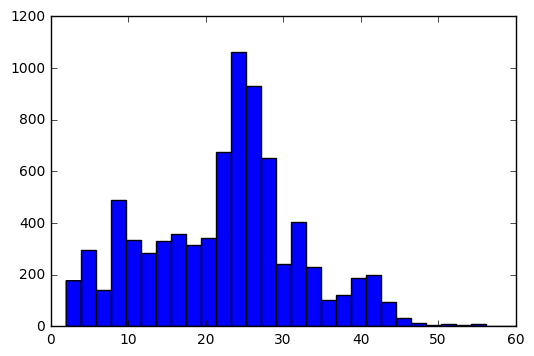

In [328]:
# plot histogram of boiler ages

pl.hist(boil['boiler_age'], bins=30)

In [329]:
print('Boiler Age Mean:', np.mean(boil['boiler_age']))
print('Boiler Age Standard Deviation:', np.std(boil['boiler_age']))

Boiler Age Mean: 22.5305666004
Boiler Age Standard Deviation: 9.98863967424


In [330]:
# calculate column for average gallons of fuel oil used per sft of building floor area

boil['mean_estimate_gallons'] = (boil['total_estimated_cosumption_high_estimate_gallons_'] + boil['total_estimated_cosumption_low_estimate_gallons_'])/2
boil['mean_estimate_gallons_per_sft'] = boil['mean_estimate_gallons'] / boil['total_area_of_buildings_on_lot']
boil.head()

,boiler_installation_date,number_of_identical_boilers,primary_fuel,total_area_of_buildings_on_lot,total_estimated_cosumption_high_estimate_gallons_,total_estimated_cosumption_high_estimate_mmbtus_,total_estimated_cosumption_low_estimate_gallons_,total_estimated_cosumption_low_estimate_mmbtus_,year_constructed,boiler_age,mean_estimate_gallons,mean_estimate_gallons_per_sft
725,1979,1,#6,32384,32016.0,4802.0,22411.0,3362.0,1927,32,27213.5,0.840338
726,1983,1,#6,240040,146000.0,21900.0,102200.0,15330.0,1926,28,124100.0,0.516997
727,1956,1,#4,21460,30814.0,4468.0,21570.0,3128.0,1925,55,26192.0,1.220503
728,1983,1,#4,23750,25309.0,3670.0,17716.0,2569.0,1931,28,21512.5,0.905789
729,1988,1,#4,29400,25000.0,3625.0,17500.0,2538.0,1917,23,21250.0,0.722789


In [331]:
# the data set includes a columnn for 'number of identical boilers' for a property.
# It's not clear how rows with more than one boiler affect the energy and floor area values
# so I'll drop them and still have approximately 7000 data points

boil = boil[(boil['number_of_identical_boilers'] == 1)]

Energy Mean: inf
Energy Standard Deviation: nan
boiler_installation_date                               int64
number_of_identical_boilers                            int64
primary_fuel                                          object
total_area_of_buildings_on_lot                         int64
total_estimated_cosumption_high_estimate_gallons_    float64
total_estimated_cosumption_high_estimate_mmbtus_     float64
total_estimated_cosumption_low_estimate_gallons_     float64
total_estimated_cosumption_low_estimate_mmbtus_      float64
year_constructed                                       int64
boiler_age                                             int64
mean_estimate_gallons                                float64
mean_estimate_gallons_per_sft                        float64
dtype: object


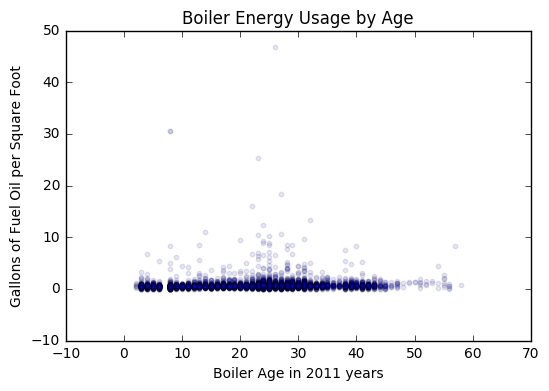

In [332]:
# scatter plot for boiler age as independant variable and gallons per sft at dependant variable

pl.scatter(boil['boiler_age'], boil['mean_estimate_gallons_per_sft'], s=10, alpha=0.1)
pl.title('Boiler Energy Usage by Age')
pl.xlabel('Boiler Age in 2011 years')
pl.ylabel('Gallons of Fuel Oil per Square Foot')

print('Energy Mean:', boil['mean_estimate_gallons_per_sft'].mean())
print('Energy Standard Deviation:', boil['mean_estimate_gallons_per_sft'].std())
print(boil.dtypes)

(array([ 184.,   81.,  137.,  196.,  281.,  396.,  587.,  729.,  854.,
         780.,  653.,  531.,  344.,  236.,  177.,  123.,   85.,   80.,
          67.,   62.,   48.,   41.,   51.,   22.,   23.,   26.,   23.,
          18.,   17.,   17.]),
 array([ 0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
         0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
         0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333,
         1.        ,  1.06666667,  1.13333333,  1.2       ,  1.26666667,
         1.33333333,  1.4       ,  1.46666667,  1.53333333,  1.6       ,
         1.66666667,  1.73333333,  1.8       ,  1.86666667,  1.93333333,  2.        ]),
 <a list of 30 Patch objects>)

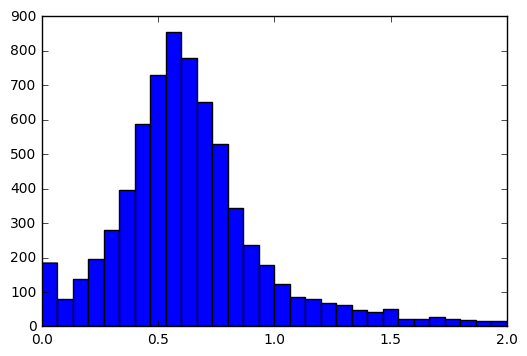

In [333]:
# looks like some outliers judging from the scatter plot, let's look at the histogram
# but first must drop infinite values

boil = boil[np.isfinite(boil['mean_estimate_gallons_per_sft'])]
pl.hist(boil['mean_estimate_gallons_per_sft'], bins=30, range=(0, 2))

In [334]:
boil = boil[pd.notnull(boil['mean_estimate_gallons_per_sft'])]

In [335]:
# let's drop zero values and calculate mean and std 
boil = boil[(boil.mean_estimate_gallons_per_sft != 0)]
print('Energy Mean:', np.mean(boil['mean_estimate_gallons_per_sft']))
print('Energy Standard Deviation:', np.std(boil['mean_estimate_gallons_per_sft']))

Energy Mean: 0.750162494162
Energy Standard Deviation: 1.11066974559


[0, 60, 0, 4]

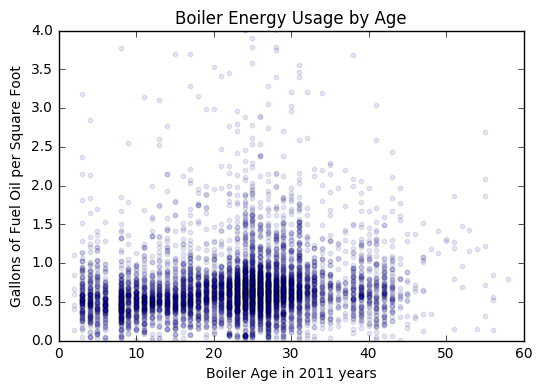

In [336]:
pl.scatter(boil['boiler_age'], boil['mean_estimate_gallons_per_sft'], s=10, alpha=0.1)
pl.title('Boiler Energy Usage by Age')
pl.xlabel('Boiler Age in 2011 years')
pl.ylabel('Gallons of Fuel Oil per Square Foot')
pl.axis([0, 60, 0, 4])

In [337]:
# let's drop outliners greater than 2 std on the right tail

boil_trim = boil[((boil['mean_estimate_gallons_per_sft'] - boil['mean_estimate_gallons_per_sft'].mean()) < (2 * boil['mean_estimate_gallons_per_sft'].std()))]

In [338]:
# fit a linear regression to our trimmed data

x = boil_trim['boiler_age']
y = boil_trim['mean_estimate_gallons_per_sft']
X = sm.add_constant(x)

boil_model = sm.OLS(y, X).fit()
boil_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     mean_estimate_gallons_per_sft   R-squared:                       0.029
Model:                                       OLS   Adj. R-squared:                  0.029
Method:                            Least Squares   F-statistic:                     204.7
Date:                           Sun, 23 Oct 2016   Prob (F-statistic):           8.94e-46
Time:                                   14:36:14   Log-Likelihood:                -2580.5
No. Observations:                           6848   AIC:                             5165.
Df Residuals:                               6846   BIC:                             5179.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5205      0.011     47.865      0.000         0.499     0.542
boiler_age     0.0063      0.000     14.307      0.000         0.005     0.007
==============================================================================
Omnibus:                     2843.917   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16518.861
Skew:                           1.909   Prob(JB):                         0.00
Kurtosis:                       9.582   Cond. No.                         62.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

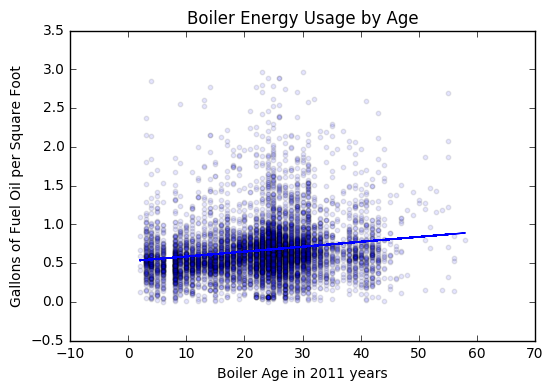

In [339]:
pl.scatter(boil_trim['boiler_age'], boil_trim['mean_estimate_gallons_per_sft'], s=10, alpha=0.1)
pl.title('Boiler Energy Usage by Age')
pl.xlabel('Boiler Age in 2011 years')
pl.ylabel('Gallons of Fuel Oil per Square Foot')

pl.plot(x, boil_model.predict(X))

## First attempt of a linear regression model for the data shows a large spread of data. Let's try modeling a linear regression by the different fuel types (#4 vs #6)

In [340]:
# strip the '#' symbol from the primary_fuel value to convert to numeric

boil_trim['primary_fuel'] = boil_trim['primary_fuel'].str.strip('#')
boil_trim.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,boiler_installation_date,number_of_identical_boilers,primary_fuel,total_area_of_buildings_on_lot,total_estimated_cosumption_high_estimate_gallons_,total_estimated_cosumption_high_estimate_mmbtus_,total_estimated_cosumption_low_estimate_gallons_,total_estimated_cosumption_low_estimate_mmbtus_,year_constructed,boiler_age,mean_estimate_gallons,mean_estimate_gallons_per_sft
725,1979,1,6,32384,32016.0,4802.0,22411.0,3362.0,1927,32,27213.5,0.840338
726,1983,1,6,240040,146000.0,21900.0,102200.0,15330.0,1926,28,124100.0,0.516997
727,1956,1,4,21460,30814.0,4468.0,21570.0,3128.0,1925,55,26192.0,1.220503
728,1983,1,4,23750,25309.0,3670.0,17716.0,2569.0,1931,28,21512.5,0.905789
729,1988,1,4,29400,25000.0,3625.0,17500.0,2538.0,1917,23,21250.0,0.722789


In [341]:
# creating new data frames for separate regressions of #4 and #6 fuel oils

boil_trim['primary_fuel'] = boil_trim['primary_fuel'].convert_objects(convert_numeric=True)
boil_trim_4 = boil_trim[(boil_trim['primary_fuel'] == 4)]
boil_trim_6 = boil_trim[(boil_trim['primary_fuel'] == 6)]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


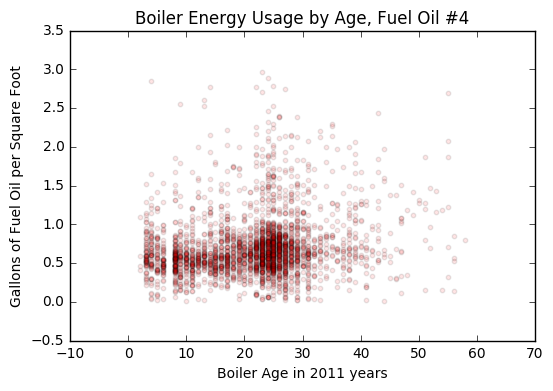

In [420]:
pl.scatter(boil_trim_4['boiler_age'], boil_trim_4['mean_estimate_gallons_per_sft'], c='red', s=10, alpha=0.1)
pl.title('Boiler Energy Usage by Age, Fuel Oil #4')
pl.xlabel('Boiler Age in 2011 years')
pl.ylabel('Gallons of Fuel Oil per Square Foot')

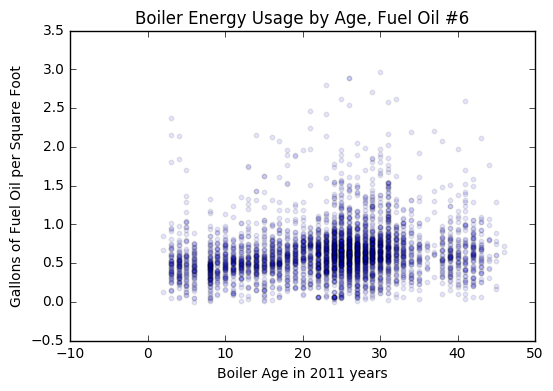

In [421]:
pl.scatter(boil_trim_6['boiler_age'], boil_trim_6['mean_estimate_gallons_per_sft'], c='blue', s=10, alpha=0.1)
pl.title('Boiler Energy Usage by Age, Fuel Oil #6')
pl.xlabel('Boiler Age in 2011 years')
pl.ylabel('Gallons of Fuel Oil per Square Foot')

In [344]:
# fit a linear regression to our #4 fuel oil boilers

x_4 = boil_trim_4['boiler_age']
y_4 = boil_trim_4['mean_estimate_gallons_per_sft']
X_4 = sm.add_constant(x_4)

boil_model_4 = sm.OLS(y_4, X_4).fit()
boil_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     mean_estimate_gallons_per_sft   R-squared:                       0.034
Model:                                       OLS   Adj. R-squared:                  0.033
Method:                            Least Squares   F-statistic:                     99.10
Date:                           Sun, 23 Oct 2016   Prob (F-statistic):           5.68e-23
Time:                                   14:36:18   Log-Likelihood:                -1329.8
No. Observations:                           2848   AIC:                             2664.
Df Residuals:                               2846   BIC:                             2675.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5468      0.018     31.196      0.000         0.512     0.581
boiler_age     0.0074      0.001      9.955      0.000         0.006     0.009
==============================================================================
Omnibus:                     1103.628   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5034.073
Skew:                           1.834   Prob(JB):                         0.00
Kurtosis:                       8.382   Cond. No.                         56.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [345]:
# fit a linear regression to our #6 fuel oil boilers

x_6 = boil_trim_6['boiler_age']
y_6 = boil_trim_6['mean_estimate_gallons_per_sft']
X_6 = sm.add_constant(x_6)

boil_model_6 = sm.OLS(y_6, X_6).fit()
boil_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     mean_estimate_gallons_per_sft   R-squared:                       0.034
Model:                                       OLS   Adj. R-squared:                  0.034
Method:                            Least Squares   F-statistic:                     140.1
Date:                           Sun, 23 Oct 2016   Prob (F-statistic):           8.63e-32
Time:                                   14:36:18   Log-Likelihood:                -1145.1
No. Observations:                           4000   AIC:                             2294.
Df Residuals:                               3998   BIC:                             2307.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4846      0.014     35.653      0.000         0.458     0.511
boiler_age     0.0064      0.001     11.836      0.000         0.005     0.007
==============================================================================
Omnibus:                     1686.439   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11496.761
Skew:                           1.870   Prob(JB):                         0.00
Kurtosis:                      10.416   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

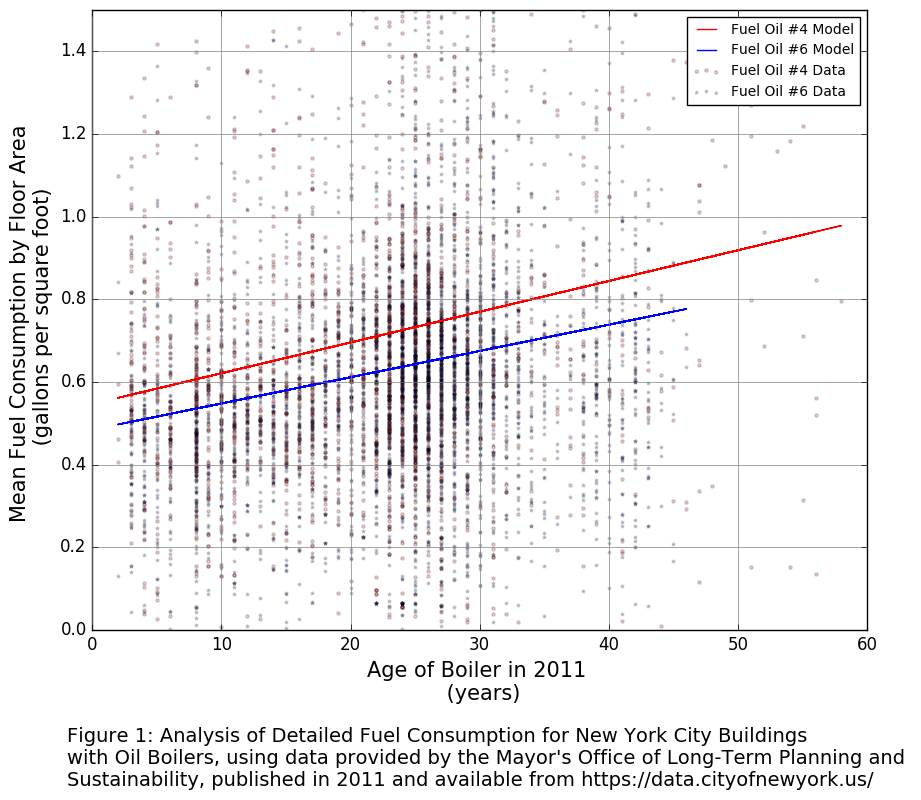

In [419]:
# final plot showning analysis of different fuel types

ax = pl.figure(figsize=(10, 8)).add_subplot(111)

ax.scatter(x_4, y_4, marker='o', c='red', s=5, alpha=0.2, label='Fuel Oil #4 Data')
ax.scatter(x_6, y_6, marker='*', c='blue', s=5, alpha=0.2, label='Fuel Oil #6 Data')

ax.plot(x_4, boil_model_4.predict(X_4), c='red', label="Fuel Oil #4 Model")
ax.plot(x_6, boil_model_6.predict(X_6), c='blue', label="Fuel Oil #6 Model")

pl.xlabel('Age of Boiler in 2011 \n (years)', fontsize=15)
pl.ylabel('Mean Fuel Consumption by Floor Area \n (gallons per square foot)', fontsize=15)

ax.grid(b=True, which='both', color='0.5', linestyle='-' )
ax.tick_params(axis='both', which='both', labelsize=12)
ax.axis([0, 60, 0, 1.5])
ax.legend(fontsize=10)

text = '''Figure 1: Analysis of Detailed Fuel Consumption for New York City Buildings 
with Oil Boilers, using data provided by the Mayor's Office of Long-Term Planning and 
Sustainability, published in 2011 and available from https://data.cityofnewyork.us/ '''

pl.figtext(.1, -0.07, text, fontsize=14)

savefig('HW7_gsm317.png', bbox_inches='tight', pad_inches=.25)

In [417]:
savefig?